## Семинар 2 "Распознавание рукописных цифр"

ФИО: Дегтярев Роман Олегович

В этом задании мы используем нейронную сеть из предыдущего семинара для распознавания рукописных цифр. Также мы исследуем как влияет выбор нелинейности и предобработка данных на качество классификации. 

Чтобы не тратить время на подготовку данных, мы прилагаем готовый код с примером использования для получения обучающей и тестовой выборок. Для запуска скрипта вам понадобится библиотека PyTorch (инструкции по установке можно найти на сайте <a href="http://pytorch.org">pytorch.org</a>)

In [2]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [3]:
to_numpy = lambda x: x.numpy()
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transforms.ToTensor())
test_dataset = MNIST('.', train=False, transform=transforms.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [4]:
## Usage example:
for X, y in train_loader:
    X = X.view(X.size(0), -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    pass

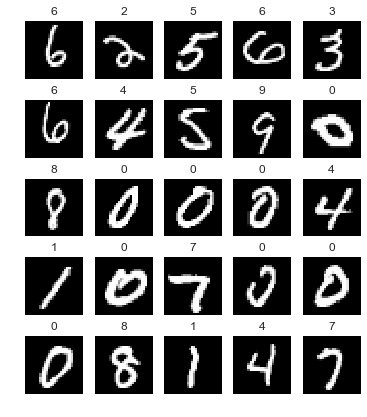

In [5]:
plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

### Часть 1: MNIST
Обучите полносвязную нейронную сеть с архитектурой 784-100-100-10 и сигмоидой в качестве нелинейности. Какую точность классификации удалось получить? Нарисуйте график сходимости на обучающей и тестовой выборках. В качестве темпа обучения (learning rate) возьмите 0.01

In [7]:
X

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [31]:
from Nnet import Linear, Sigmoid, NLLLoss, NeuralNetwork, ReLU, eLU

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
model = NeuralNetwork([Linear(784,100), Sigmoid(), Linear(100,100), Sigmoid(), Linear(100,10)])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
### YOUR CODE HERE:
lr = 0.01
loss = NLLLoss()
losts_train = []
for i in range(1000):
    losts_train.append(loss.forward(model.forward(X_train), y_train))
    model.backward(loss.backward())
    model.step(lr)
score_train = loss.y
losts_test = []
for i in range(1000):
    losts_test.append(loss.forward(model.forward(X_test), y_test))
    model.backward(loss.backward())
    model.step(lr)
score_test = loss.y

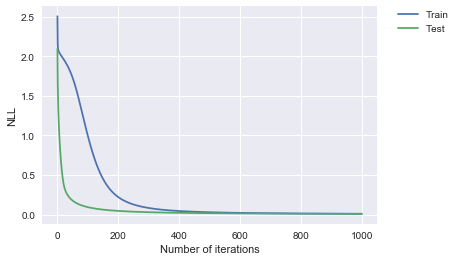

In [36]:
plt.plot(np.array(losts_train).mean(axis=1), label='Train')
plt.plot(np.array(losts_test).mean(axis=1), label='Test')
plt.ylabel('NLL')
plt.xlabel('Number of iterations')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [11]:
y_test

array([8, 0, 1, 4, 3, 9, 3, 9, 9, 6, 7])

In [12]:
score_test

array([8, 0, 1, 4, 3, 9, 3, 9, 9, 6, 7])

### Часть 2: Нелинейности

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

In [13]:
model = NeuralNetwork([Linear(784,100), ReLU(), Linear(100,100), ReLU(), Linear(100,10)])

In [14]:
### YOUR CODE HERE:
lr = 0.01
loss = NLLLoss()
losts_train = []
for i in range(1000):
    losts_train.append(loss.forward(model.forward(X_train), y_train))
    model.backward(loss.backward())
    model.step(lr)
score_train = loss.y
losts_test = []
for i in range(1000):
    losts_test.append(loss.forward(model.forward(X_test), y_test))
    model.backward(loss.backward())
    model.step(lr)
score_test = loss.y

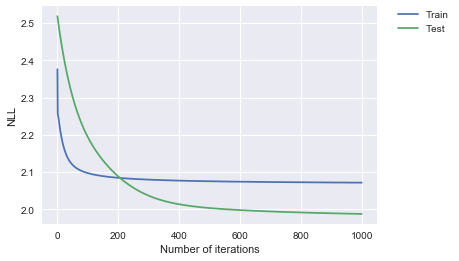

In [15]:
plt.plot(np.array(losts_train).mean(axis=1), label='Train')
plt.plot(np.array(losts_test).mean(axis=1), label='Test')
plt.ylabel('NLL')
plt.xlabel('Number of iterations')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

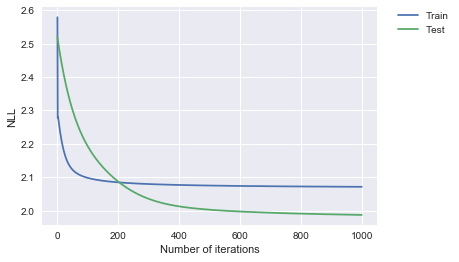

In [16]:
model = NeuralNetwork([Linear(784,100), eLU(0.01), Linear(100,100), eLU(0.01), Linear(100,10)])
### YOUR CODE HERE:
lr = 0.01
loss = NLLLoss()
losts_train = []
for i in range(1000):
    losts_train.append(loss.forward(model.forward(X_train), y_train))
    model.backward(loss.backward())
    model.step(lr)
score_train = loss.y
losts_test = []
for i in range(1000):
    losts_test.append(loss.forward(model.forward(X_test), y_test))
    model.backward(loss.backward())
    model.step(lr)
score_test = loss.y

plt.plot(np.array(losts_train).mean(axis=1), label='Train')
plt.plot(np.array(losts_test).mean(axis=1), label='Test')
plt.ylabel('NLL')
plt.xlabel('Number of iterations')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [17]:
#У relu и elu примерно одинаковые скорости сходимости.

### Часть 3: Предобработка данных

Посчитайте на всей обучающей выборке матрицу ковариации и среднее. Нормализуйте данные по схеме: вычесть среднее, декоррелировать, нормировать дисперсию. Сравните графики обучения на одной и той же архитектуре с и без предобработки.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
cov_matrix = np.cov(X_train)

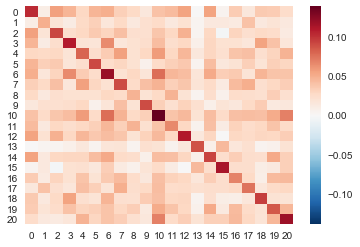

In [20]:
corr = pd.DataFrame(cov_matrix)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [21]:
mean = X_train.mean()

In [22]:
#X_train = preprocessing.scale(X_train)

In [38]:
X_train = X_train - mean/X_train.std()

In [39]:
cov_matrix = np.cov(X_train)

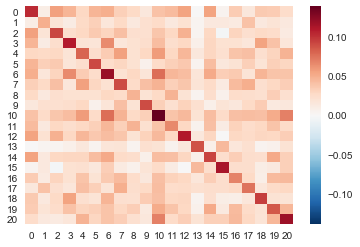

In [40]:
corr = pd.DataFrame(cov_matrix)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#Корреляция не изменилась

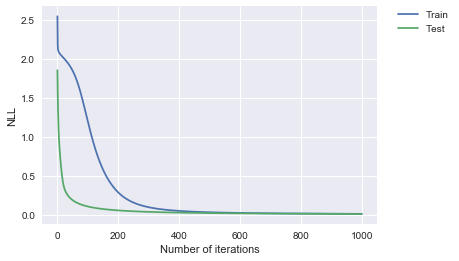

In [49]:
### YOUR CODE HERE:
model = NeuralNetwork([Linear(784,100), Sigmoid(), Linear(100,100), Sigmoid(), Linear(100,10)])
lr = 0.01
loss = NLLLoss()
losts_train = []
for i in range(1000):
    losts_train.append(loss.forward(model.forward(X_train), y_train))
    model.backward(loss.backward())
    model.step(lr)
score_train = loss.y
losts_test = []
for i in range(1000):
    losts_test.append(loss.forward(model.forward(X_test), y_test))
    model.backward(loss.backward())
    model.step(lr)
score_test = loss.y
plt.plot(np.array(losts_train).mean(axis=1), label='Train')
plt.plot(np.array(losts_test).mean(axis=1), label='Test')
plt.ylabel('NLL')
plt.xlabel('Number of iterations')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

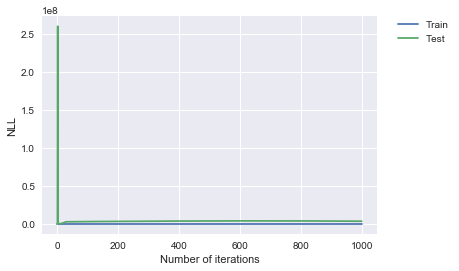

In [50]:
model = NeuralNetwork([Linear(784,100), eLU(0.01), Linear(100,100), eLU(0.01), Linear(100,10)])
### YOUR CODE HERE:
lr = 0.01
loss = NLLLoss()
losts_train = []
for i in range(1000):
    losts_train.append(loss.forward(model.forward(X_train), y_train))
    model.backward(loss.backward())
    model.step(lr)
score_train = loss.y
losts_test = []
for i in range(1000):
    losts_test.append(loss.forward(model.forward(X_test), y_test))
    model.backward(loss.backward())
    model.step(lr)
score_test = loss.y

plt.plot(np.array(losts_train).mean(axis=1), label='Train')
plt.plot(np.array(losts_test).mean(axis=1), label='Test')
plt.ylabel('NLL')
plt.xlabel('Number of iterations')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Часть 4: Выводы
Опишите полученные результаты: как влияют выбор нелинейности и предобработка данных на скорость сходимости и итоговое качество?

In [53]:
#Нормализовать признаки - это хорошая идея, все сходится быстрее, 
#но явного улучшения в зависимости от выбора ReLu, eLu, softmax - я не заметил.